<div class="alert alert-warning">
    
Lectura recomendada: [Best Practices for Scientific Computing](http://arxiv.org/pdf/1210.0530v3.pdf)
</div>

# Caos: Primera parte

## Introducción

- Edward Lorenz la definió como:

    **Caos** Cuando el presente determina el futuro, pero el presente aproximado no determina aproximadamente el futuro.

- La **teoría del caos** estudia el comportamiento de los sistemas dinámicos que son muy sensibles a las condiciones iniciales (El famoso _efecto mariposa_ según [Jurassic Park](http://en.wikipedia.org/wiki/Jurassic_Park_%28film%29)). 
        - Aunque no es lo único, ve más adelante.
        
- Este hecho hace que la predicción  alargo plazo sea imposible.

- Entonces la afirmación **determinismo** $\to$ **predictibilidad** es falsa.



Chaos was the law of nature; Order was the dream of man
-- Henry Adams

- Para saber **muchísimo más** recomiendo: [Chaos Book](http://chaosbook.org/)

Durante siglos en física se estuvo trabajando con sistemas como el [oscilador armónico](http://en.wikipedia.org/wiki/Harmonic_oscillator) y el problema de dos cuerpos con fuerza central (también conocido como [_problema de Kepler_](http://en.wikipedia.org/wiki/Kepler_problem)) los cuales se consideraban como paradigmáticos para resolver problemas. La explosión del caos en el siglo XX nos señalaba que esos problemas y métodos no eran la norma, si no al contrario: eran casos especiales.

A lo largo del curso (sobre todo en la última parte) podría quedar el sabor de boca de que las herramientas analíticas son un fraude y que hemos sido engañados durante toda nuestra educación y que el único camino son las simulaciones y la estadística.

Pero eso no es cierto: Existen teorías que tienen el mismo poder predictivo, y el estudio del caso general sigue abriendo el camino para la comprehensión científica del mundo.

Lo que si es cierto, es que, partiendo de la definición de que un **sistema determinístico** es aquel que su estado futuro esta _completamente_ determinado por sus condiciones actuales (en contraste con un sistema estocástico en el cual el futuro está determinado sólo parcialmente) ya no implica **predictibilidad**.

## Sensitividad a condiciones iniciales

Una de las características que puede indicar **caos** es la sensibiliad a condiciones iniciales, la cual se puede expresar matemáticamente como:

$$
|\delta\mathbf{x}(t)| = e^{\lambda t}|\delta\mathbf{x}(0)|
$$

a $\lambda$ se le conoce como _exponente de Lyapunov_. Si este exponente positivo indica que con el paso del tiempo la diferencia $\delta$ crece exponencialmente.

<div class="alert alert-danger">
    
**NOTA** La sensibilidad es una idea muy importante pero no determina completamente si el sistema es caotico o no, para ello se necesita otra característica: _mezcla topológica_ (topological mixing), la cual verémos más adelante, pero se puede entender como que las trayectorias del sistema, luego de diverger se vueven a aproximar un número infinito de veces.
</div>

### Mapeos

A los sistemas dinámicos discretos, en una dimensión se les conoce como **mapas**, ya que son funciones

$$
f: \mathrm{R} \to \mathrm{R}
$$

y los cuales producen la _secuencia_ de puntos:

$$
\{x, f(x), f^2(x), f^3(x), \ldots\}
$$

la cual se conoce como _órbita_ de $x$ bajo $f$.

Los sistemas dinámicos discretos, se pueden pensar como ecuaciones de diferencias de primer orden

$$
y = x_{n+1} = f(x_n)
$$

y regularmente 

$$
y=f(x) = f(x, a)
$$

existe un parámetro $a$ que puede influir muchísimo en el comportamiento del sistema.

### Comportamientos

Pueden pasar lo siguiente:

- Si $f(x) = x$ hemos alcanzado un _punto fijo_.

- Si $f^n(x) = x$, pero $f^k(x) \neq x$ para $k \leq n$, se dice que la órbita tiene _periodo_ de orden $n$.

### Mapeo logístico

$$
x_{n+1} = rx_n(1 -x_n)
$$

Donde, para fines de esta clase, $r$ esta contenido en 

$$
0 \leq r \leq 4
$$

la razón de esto, es que el cuadro unitario mapea al cuadro unitario, i.e.

$$ 
0 \leq x \leq 1 \to 0 \leq f(x) \leq 1
$$

<div class="alert alert-info">
    
**Ejercicio** ¿Por qué?
</div>

Esto es porque como r esta entre 0 y 4 y x entre 0 y 1, esto implica que igual 1-x esta entre 0 y 1 y usando r, rx(1-x) esta entre 0 y 4 y por ende f(x) esta entre 0 y 1

<div class="alert alert-info">
    
**Ejercicio**  Define la función `logistic_map` que recibe como parámetros $x$ y $r$ regresa $rx(1−x)$. 
</div>

In [107]:
def logistic_map(x,r):
    return r*x*(1-x)

Los _puntos fijos_ del mapeo logístico son:

$$
x = f(x)
$$

$$
x = rx(1-x)
$$

$$
1 = r(1-x)
$$

$$
x = 1 - \frac{1}{r}
$$

El punto fijo se dice _estable_ si $|f(x) - x_0| < |x - x_0|$ e _inestable_ si la desigualdad se invierte.

<div class="alert alert-info">
    
**Ejercicio** Calcule el punto fijo para $r = 2$ usando SymPy
</div>

In [108]:
from sympy import *
x, r = symbols('x r')
f = Function('f')

In [109]:
Eq(x,logistic_map(x,r))

Eq(x, r*x*(1 - x))

In [110]:
solve(Eq(x,logistic_map(x,2)))

[0, 1/2]

<div class="alert alert-warning">

**Teorema:**

Sea $f(x_0) = x_0.$, entonces, 

<ul>
<li>Si $f'(x)$ es contínua y $|f'(x_0)| < 1$ entonces $x_0$ es estable.</li>


<li>Si $f'(x)$ es contínua y $|f'(x_0)| > 1$ entonces $x_0$ es inestable.</li>
</ul>
</div>

<div class="alert alert-info">
    
**Ejercicio** ¿Cuáles son las condiciones de estabilidad para el parámetro $r$? Los valores de $r$ para cuales cambia de estable a inestable y viceversa, se llaman _puntos de bifurcación_.
</div>

In [111]:
abs(diff(logistic_map(x,r),x))

Abs(-r*x + r*(1 - x))

In [112]:
diff(logistic_map(x,r),x).replace(x,1-1/r)

-r*(1 - 1/r) + 1

In [113]:
solve(abs(diff(logistic_map(x,r),x).replace(x,1-1/r))<1)

(1 < r) & (r < 3)

<div class="alert alert-info">
    
**Ejercicio** Define una función `iterar` que reciba una función `g`, un punto inicial `x0`, un entero `N` y el parámetro `r` regrese $g(g( \ldots(g(x_0, r),r) \ldots)$. En otras palabras que itere `g`, `N` veces a partir del punto `x0`.
</div>

In [114]:
def iterar(g, x0, N, r):
    if N == 0:
        return x0
    if N > 1:
        return g(iterar(g,x0,N-1,r),r)
    else:
        return g(x0,r)

<div class="alert alert-info">
    
**Ejercicio** Define una función `iterarLista` que reciba una función `g`, un punto inicial `x0`, un entero `N` y el parámetro $r$ regrese la lista $[x_0, g(x), g(g(x)), \ldots g(g(\ldots(g(x))\ldots))]$ En otras palabras que itere `g`, `N-1` veces a partir del punto `x0` y devuelva la órbita completa empezando desde `x0`.
</div>

In [115]:
def iterarLista(g, x0, N, r):
    return [iterar(g,x0,i,r) for i in range(N)]

In [116]:
iterarLista(logistic_map,1/4,100,3)

[0.25,
 0.5625,
 0.73828125,
 0.5796661376953125,
 0.7309599195141345,
 0.5899725467340735,
 0.7257148225025549,
 0.5971584567079203,
 0.7216807028704055,
 0.6025729979246489,
 0.7184363402902498,
 0.6068566957218066,
 0.7157449397382518,
 0.6103623629320143,
 0.713460446544187,
 0.6133039132834688,
 0.7114866697039566,
 0.6158201656125887,
 0.7097570677124175,
 0.6180059176340649,
 0.7082238102100269,
 0.6199285345848561,
 0.706851439776987,
 0.6216374455865626,
 0.7056129954935281,
 0.6231698882525353,
 0.7044875358835738,
 0.6245545430047923,
 0.7034584974506021,
 0.6258139194454301,
 0.7025125730213365,
 0.6269659733048335,
 0.701638924868269,
 0.6280252319339057,
 0.7008286199648089,
 0.6290035962090911,
 0.7000742164953654,
 0.629910923681297,
 0.6993694557248167,
 0.630755460371971,
 0.6987090287487417,
 0.6315441656811952,
 0.6980883974257147,
 0.6322829604159362,
 0.6975036551507876,
 0.6329769186062363,
 0.6969514173539713,
 0.6336304176067855,
 0.6964287344707083,
 0.6342472

<div class="alert alert-info">
    
**Ejercicio** Usa las funciones recién definidas para calcular iteraciones para $r = \{ 0.8, 1.2, 2.8, 3.2\}$,
</div>

In [117]:
x = iterarLista(logistic_map,0.35,100,0.8)
x

[0.35,
 0.182,
 0.11910080000000002,
 0.08393263955148803,
 0.06151036125552642,
 0.04618146937099284,
 0.03523899300618311,
 0.02719776510247463,
 0.0211664373407242,
 0.016574735416820318,
 0.013040010850146177,
 0.010295975173739397,
 0.00815197445516891,
 0.006468415814120948,
 0.0051412603287812626,
 0.00409186221681037,
 0.0032600951043272076,
 0.0025995735073903593,
 0.0020742525799760272,
 0.001655960044968392,
 0.0013225742730382883,
 0.0010566600562644686,
 0.0008444348206319711,
 0.0006749774003725404,
 0.0005396174447052213,
 0.0004314610061748729,
 0.0003450198780600188,
 0.0002759206714750098,
 0.00022067563140645008,
 0.00017650154693772276,
 0.00014117631531332107,
 0.00011292510764905251,
 9.032988445529197e-05,
 7.225737997381302e-05,
 5.7801727075881866e-05,
 4.6238708828983126e-05,
 3.698925664863117e-05,
 2.9590310754819002e-05,
 2.367154813466275e-05,
 1.893679023397733e-05,
 1.5149145305562372e-05,
 1.2119132647167107e-05,
 9.69518861903279e-06,
 7.75607569788034

In [118]:
x = iterarLista(logistic_map,0.35,100,1.2)
x

[0.35,
 0.273,
 0.2381652,
 0.217731045010752,
 0.20438908445913342,
 0.19513702393570878,
 0.18847027899026808,
 0.1835390795131183,
 0.17982298296551463,
 0.1769840133154786,
 0.1747928068154701,
 0.17308833780124783,
 0.17175451814213874,
 0.17070588436788056,
 0.1698784624920724,
 0.16922372456808232,
 0.16870446673366576,
 0.16829192356533026,
 0.16796370243361355,
 0.16770227651808728,
 0.1674938675624859,
 0.16732760626973558,
 0.16719489413973113,
 0.16708891381600227,
 0.167004250434949,
 0.1669365969259318,
 0.16688252343926493,
 0.16683929617176974,
 0.1668047345096139,
 0.16677709806574934,
 0.1667549971518201,
 0.16673732169205988,
 0.16672318469642208,
 0.16671187725732575,
 0.16670283268639693,
 0.1666955979128737,
 0.16668981065921187,
 0.16668518121792955,
 0.16668147789633064,
 0.16667851538715084,
 0.1666761454745834,
 0.16667424960518268,
 0.1666727329484783,
 0.16667151964795623,
 0.16667054902343661,
 0.1666697725339954,
 0.16666915134895396,
 0.1666686544050881,


In [119]:
x = iterarLista(logistic_map,0.35,100,2.8)
x

[0.35,
 0.6369999999999999,
 0.6474468000000001,
 0.6391264352753279,
 0.6458027380212239,
 0.6404763724394401,
 0.6447458886015159,
 0.6413361576522811,
 0.6440674535122507,
 0.6418847927477873,
 0.6436323756433688,
 0.6422352738677181,
 0.6433535552297706,
 0.6424593229683583,
 0.6431749556383115,
 0.642602609818309,
 0.6430605878844199,
 0.6426942709436596,
 0.6429873661116009,
 0.6427529167709075,
 0.6429404933095153,
 0.6427904430428106,
 0.6429104902517859,
 0.6428144569727837,
 0.6428912864627929,
 0.6428298247084225,
 0.6428789952865316,
 0.6428396595765515,
 0.6428711286257536,
 0.6428459536945694,
 0.6428660938366489,
 0.6428499818492018,
 0.6428628715199115,
 0.6428525598350386,
 0.6428608092160147,
 0.6428542097324071,
 0.6428594893328423,
 0.6428552656611666,
 0.642858644604057,
 0.6428559414532968,
 0.6428581039761782,
 0.642856373959328,
 0.6428577579737393,
 0.6428566507628062,
 0.6428575365319341,
 0.6428568279168758,
 0.6428573948090787,
 0.6428569412954164,
 0.642857

In [120]:
x = iterarLista(logistic_map,0.35,100,3.2)
x

[0.35,
 0.728,
 0.6336512000000001,
 0.7428395415633919,
 0.6112926625705012,
 0.7603646184254994,
 0.5830728495108611,
 0.7779164853572667,
 0.5528397669333255,
 0.7910654688973819,
 0.528898857009751,
 0.7973275394032959,
 0.5171082697996209,
 0.7990633827342829,
 0.5137954979440891,
 0.7993909895567188,
 0.5131681131911958,
 0.7994451225439483,
 0.5130643794708474,
 0.7994538303649334,
 0.5130476911352629,
 0.7994552248193242,
 0.5130450186509057,
 0.7994554479628722,
 0.5130445909931378,
 0.7994554836666297,
 0.5130445225663517,
 0.799455489379251,
 0.5130445116180264,
 0.799455490293271,
 0.5130445098662934,
 0.7994554904395141,
 0.5130445095860162,
 0.7994554904629131,
 0.5130445095411718,
 0.7994554904666569,
 0.5130445095339967,
 0.799455490467256,
 0.5130445095328486,
 0.7994554904673519,
 0.5130445095326648,
 0.7994554904673672,
 0.5130445095326355,
 0.7994554904673696,
 0.5130445095326307,
 0.79945549046737,
 0.5130445095326301,
 0.7994554904673701,
 0.5130445095326298,
 0.7

<div class="alert alert-info">
    
**Ejercicio** Programa un control para cambiar $r$ entre $0$ y $4$ (con un slider) y otro para definid $x_0$. Grafica `logistic_map` respecto al número de iteraciones $N$. ¿Qué observas? ¿Puedes ver algún _periodo_?¿Está cerca de los puntos fijos?
</div>

In [121]:
from ipywidgets import interact
import matplotlib.pyplot as plt

In [122]:
fig, x = plt.subplots(figsize=(6, 4))

X = []
for i in range (100):
    X.append(i)
    
@widgets.interact(r = (0,4,0.4),x0 = (0,1,0.01))

def control(x0 = 0.25, r = 1):
    for j in (x.lines):
        j.remove()
    plt.plot(X, iterarLista(g = logistic_map, x0 = x0 , N = 100, r = r))
    plt.show()

interactive(children=(FloatSlider(value=0.25, description='x0', max=1.0, step=0.01), FloatSlider(value=1.0, de…

<div class="alert alert-info">
    
**Ejercicio** ¿Qué sucede para (a) $x_0 = 0.35$ en $r = 2.8$ y (b) para $x_0 = 0.35$ en $r=3.1$. ¿Porqué escogí estos valores?
</div>

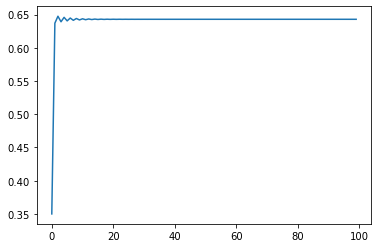

In [123]:
a = iterarLista(logistic_map,0.35,100,2.8)
a

X = []
for i in range (100):
    X.append(i)
    
plt.plot(X,a)

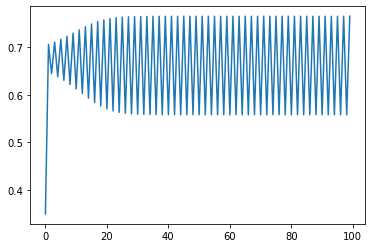

In [124]:
b = iterarLista(logistic_map,0.35,100,3.1)
b

X = []
for i in range (100):
    X.append(i)
    
plt.plot(X,b)

Estos puntos enseñan que a pesar de ser muy cercanos y tener las iteraciones como el valor de r iguales, como podemos ver en las graficas, son muy diferentes

## Diagrama de CobWeb

<div class="alert alert-info">
    
**Ejercicio** Dibuja en una gráfica `logistic_map`, como ejes usa $N_{n+1}$ y $N_n$, además agrega la línea $y = x$ en la misma gráfica. ¿Qué observas para los distintos valores de $r$? Grafícala junto a la gráfica anterior.
</div>

In [125]:
from ipywidgets import interactive
import matplotlib.pyplot as plt

In [126]:
def logistic_map(x,r):
    return r*x*(1-x)

@widgets.interact(r = (0,4,0.4))

def logistic_graph(r):
    X = []
    Y = []
    for i in range(100):
        x = i/100
        X.append(x)
        Y.append(logistic_map(x,r))
    plt.plot(X,Y)
    plt.plot(X,X)
    plt.show()

interactive(children=(FloatSlider(value=2.0, description='r', max=4.0, step=0.4), Output()), _dom_classes=('wi…

<div class="alert alert-info">
    
**Ejercicio** Agrega los segmentos de línea $(x_0, x_0), (x_0. f(x_0)), (f(x_0), f(x_0)), (f(x_0), f(f(x_0))), \ldots$
</div>

In [127]:
def logistic_map(x,r):
    return r*x*(1-x)

@widgets.interact(r = (0,4,0.4))

def logistic_graph(r):
    X = []
    Y = []
    X_0 = []
    Y_0 = []
    for i in range(100):
        x = i/100
        X.append(x)
        Y.append(logistic_map(x,r))
        if (i % 2 == 0):
            X_0.append(x)
            Y_0.append(logistic_map(x,r))
        elif (i % 2 == 1):
            X_0.append(logistic_map(x,r))
            Y_0.append(logistic_map(x,r))
    plt.plot(X,Y)
    plt.plot(X,X)
    plt.plot(X_0,Y_0)
    plt.show()

#La verdad profesor no estoy seguro que esto sea lo que pidio, pero claramente no estoy seguro de que pide y
#ademas la verdad se ve bastante padre entonces lo voy a dejar :)

interactive(children=(FloatSlider(value=2.0, description='r', max=4.0, step=0.4), Output()), _dom_classes=('wi…

## Diagrama de Bifurcación

<div class="alert alert-info">
    
**Ejercicio** ¿Qué hace el siguiente código? Modificalo para que use nuestras funciones.
</div>

In [128]:
import math
from PIL import Image
imgx = 1000
imgy = 500
image = Image.new("RGB", (imgx, imgy))

xa = 1
xb = 4
maxit = 5000

def logistic_map(x,r):
    return r*x*(1-x)

for i in range(imgx):
    r = xa + (xb - xa) * float(i) / (imgx - 1)
    x = 0.5
    for j in range(maxit):
        x = logistic_map(x,r)
        if j > maxit / 2:
            image.putpixel((i, int(x * imgy)), (255, 255, 255))

image.save("bifurcacion.png", "PNG")

<img src="./bifurcacion.png"/>

### Pasos para producir el diagrama de bifurcación

1. Escoje un valor inicial para `r`
2. Escoje un valor al azar para `x` en `[0,1]`
3. Calcula la órbita de `x` bajo el `g` (en el caso anterior el mapeo logístico)
4. Ignora las primeras `n` iteraciones y dibuja el valor de `x` para la iteración `n+1`
5. Incrementa `r` y repite hasta `r` final.

<div class="alert alert-info">
**Ejercicio** Repite todo lo anterior para el mapeo

$$
f(x,\mu) = 1 - \mu x^2
$$

¿Qué diferencia observas? ¿Cuáles son sus puntos fijos? ¿Cuáles son los valores interesantes?
</div>

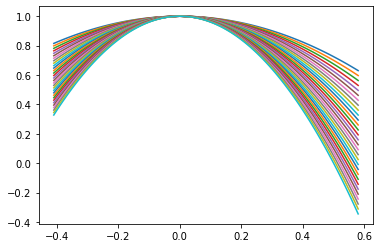

In [132]:
import random

def logistic_map(x, r):
    return 1 - r*x**2

X = []
for i in range(100):
    x = i/100
    X.append(x)

r = 1
x = random.choice(X)

def logistic_graph(r,x0):
    X = []
    Y = []
    for i in range(100):
        x = (i/100) - x0
        if (x0 > 0):
            X.append(x)
            Y.append(logistic_map(x,r))
    plt.plot(X,Y)

new_r = r
    
while (new_r<=4):
    new_r = new_r + 0.1
    logistic_graph(new_r,x)
    
plt.show()